# Wavelet Transformation

## Description
* Air quality in a city is being monitored. We analyze the concentration of fine particulate matter (PM2.5) in the city of Beijing. Apply a wavelet transform on the time series, and then find a pattern, such as the peak value and duration of fine-dust attacks, in every 1 year cycle. Again, discuss the result for the feature extraction.

## Backgrounds

### Short-Time Fourier Transformation
$$F(\tau, \omega) = \int_{-\infty}^{+\infty} f(t)w(t-\tau)e^{-i\omega t}dt$$

Window Function: $w(t-\tau)$
+ Considering that **Fourier transformation** is inappropriate to represent signals in time, the frequency - time relationship could not be analyzed efficiently.
    - 어느 주파수가 언제 존재하는지는 알 수가 없다
+ High frequency needs narrow time interval, low frequency needs wide time interval. Thus, constant time interval might hinder the fine resolution analysis
    - 높은 주파수는 좁은 영역을, 낮은 주파수는 넓은 영역을 필요로 하니, window 의 지정에도 한계가 있다


### Wavelet Transformation
[<img src="https://t1.daumcdn.net/cfile/tistory/99B4BF495C41525405" srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99B4BF495C41525405" width="496" height="204" data-origin-width="496" data-origin-height="204" data-ke-mobilestyle="widthContent">][https://slideplayer.com/slide/7537671/, 이 웨이블릿 변환에 관한 Alexander Kolesnikov 강의 PPT, Very Good!]

$$F(\tau, s) =\frac{1}{\sqrt{|s|}}\int_{-\infty}^{+\infty} f(t)\psi^*(\frac{t-\tau}{s})dt$$

$\psi^*(\frac{t-\tau}{s})$: Wavelet Function (Work basis function like cosine and sine in Fourier Transformation & window function)

+ Types of wavelet functions (https://www.mathworks.com/videos/understanding-wavelets-part-1-what-are-wavelets-121279.htm)
[<img src="https://t1.daumcdn.net/cfile/tistory/99A5573C5C4358AD14" srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A5573C5C4358AD14" width="500" height="257" style="width: 500px; height: 257px;" data-origin-width="900" data-origin-height="462" data-ke-mobilestyle="widthContent">]

s: 1/f
+ **Wavelet Transformation** presents multiresolution analysis by differentiating time interval for various frequencies.

+ It reduces the original data with same length by compressing the original data to transformed data. Using the part of them which is the most representative ensures the feature extraction.

#### Discrete Wavelet Transformation
$$D[a, b] = \frac{1}{b} \sum_{m=0}^{p-1} f(t_m) \psi[\frac{t_m -a}{b}]$$

a: Translation parameter $a = k2^{-j}$
b: Dilatation parameter $b = 2^{-j}$

+ Scaling & Shifting
<img src="https://t1.daumcdn.net/cfile/tistory/999C26485C435E8431" srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F999C26485C435E8431" width="900" height="173" data-origin-width="900" data-origin-height="173" data-ke-mobilestyle="widthContent">

    - 작은 스케일의 웨이블릿을 시작~끝까지 이동시키며 비교하고, 유사도를 c 계수에 기록
    - 웨이블릿의 스케일을 좀 더 확장시켜서 반복
    - 스케일이 커질수록(Wide time interval) 신호 내 완만한 변화들 (Low Frequency)과 닮기에 큰 c 값 주고, 스케일이 작을 때에는(Narrow time interval) 급한 변화들 (High Frequency)과 닮았기에 그 때 큰 c 값을 줌.

+ Make L to the square of 2 ($2^n$), insert padding 0s,
+ Apply two functions (Smoothing & Weighted differences) to generate 2 datasets (each L/2)
+ Generate two datasets of each length of L/2
    - Low-frequency version for frequency analysis
    - High-frequency version for time-series analysis
+ Iterates untile the L becomes 2

+ Approximation (Low frequency) & Detail (High Frequency) parameter
[<img src="https://t1.daumcdn.net/cfile/tistory/99C83F4D5C4535D437" srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99C83F4D5C4535D437" width="570" height="371" style="width: 570px; height: 371px;" data-origin-width="900" data-origin-height="585" data-ke-mobilestyle="widthContent">]
    - Low pass filter: Iterates until the length becomes 2
    - High pass filter: Generates high frequency's c value

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Rawdata/BeijingPM2.5Data.csv')
print(df)

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
0       0   0  
1      

In [3]:
import pywt
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import datetime as dt
w = pywt.families()
print(w)
# The types of wavelet functions (Haar (Daubechies 2), Mexican Hot, Meyer, Daubechies ...)

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [6]:
df_clean = pd.concat([df['year'], df['month'],df['day'], df['pm2.5']], axis = 1, names = ['year', 'pm2.5'])
df_2010 = df_clean[df_clean['year'] == 2010].fillna(0)
df_2011 = df_clean[df_clean['year'] == 2011].fillna(0)
df_2012 = df_clean[df_clean['year'] == 2012].fillna(0)
df_2013 = df_clean[df_clean['year'] == 2013].fillna(0)
df_2014 = df_clean[df_clean['year'] == 2014].fillna(0)
inputs = [df_2010, df_2011, df_2012, df_2013, df_2014]
#len(cD) == len(cA) == math.floor((len(df_2010) + w.dec_len-1)/2) 

year  month  day  pm2.5
0     2010      1    1    0.0
1     2010      1    1    0.0
2     2010      1    1    0.0
3     2010      1    1    0.0
4     2010      1    1    0.0
...    ...    ...  ...    ...
8755  2010     12   31   27.0
8756  2010     12   31   17.0
8757  2010     12   31   19.0
8758  2010     12   31   16.0
8759  2010     12   31   22.0

[8760 rows x 4 columns]

In [20]:
print(len(df_2010[df_2010['month'] == 1]))
print(len(df_2010[df_2010['month'] == 2]))
month_ticks = []
for i in inputs:
    temp = 0
    month_temp = []
    for j in range(12):
        temp += len(i[i['month'] == j+1])
        month_temp.append(temp)
    month_ticks.append(month_temp)
month_ticks


#assert len(cD) == len(cA) == math.floor((len(df_2010) + w.dec_len-1)/2) #dec_len: Decomposition Length

744
672


[[744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760],
 [744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760],
 [744, 1440, 2184, 2904, 3648, 4368, 5112, 5856, 6576, 7320, 8040, 8784],
 [744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760],
 [744, 1416, 2160, 2880, 3624, 4344, 5088, 5832, 6552, 7296, 8016, 8760]]

In [12]:
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

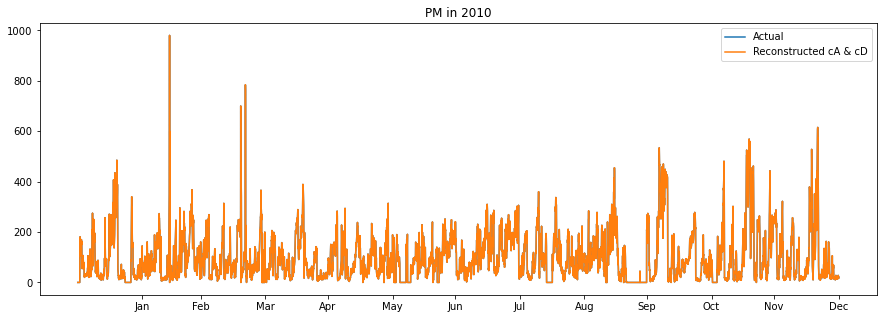

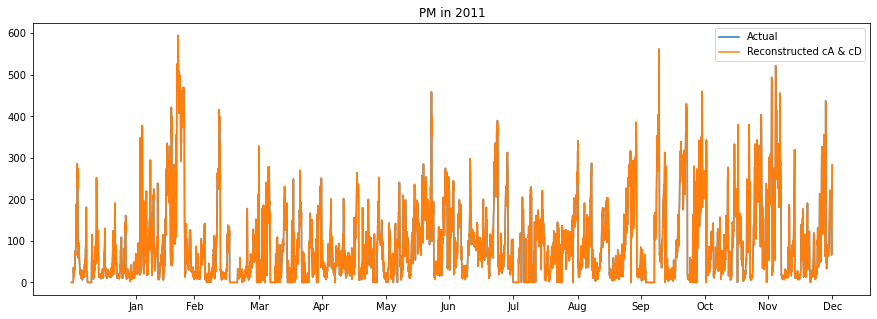

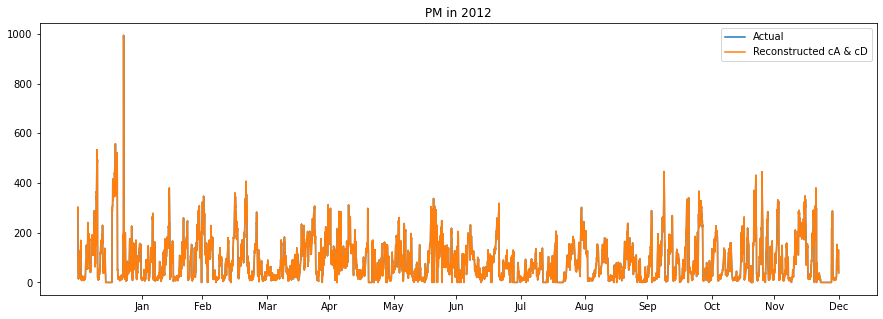

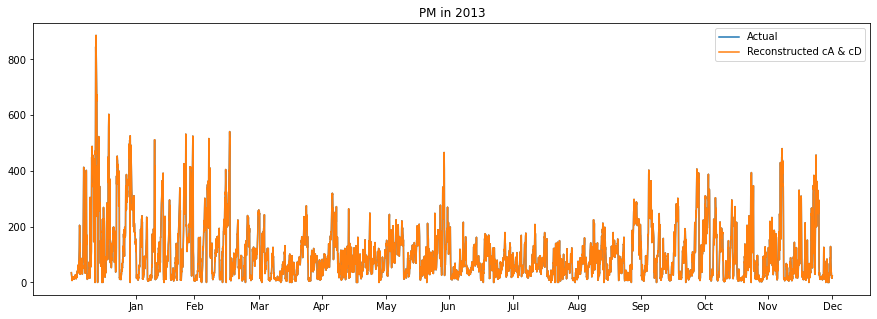

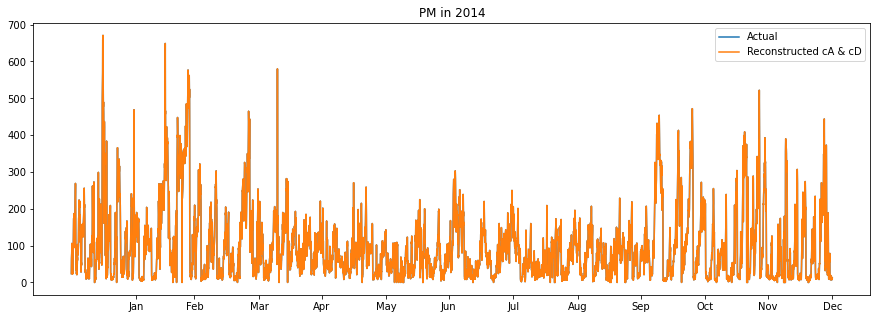

In [47]:
w = pywt.Wavelet('db4')
for k, i in enumerate(inputs):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(i['pm2.5'].reset_index(drop = True), label = 'Actual')
    cA, cD = pywt.dwt(i['pm2.5'], wavelet = w)
    recon = pywt.idwt(cA, cD, wavelet = w)
    ax.plot(recon, label = 'Reconstructed cA & cD')
    plt.xticks(month_ticks[k], month_label)
    plt.title(label = 'PM in 201{}'.format(str(k)))
    plt.legend()
    #plt.show()
    #fig.savefig('./Rawdata/P8_figure/PM in 201{}.png'.format(str(k)))

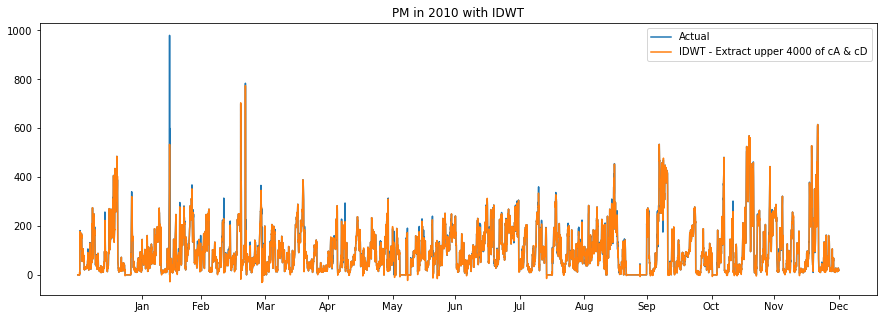

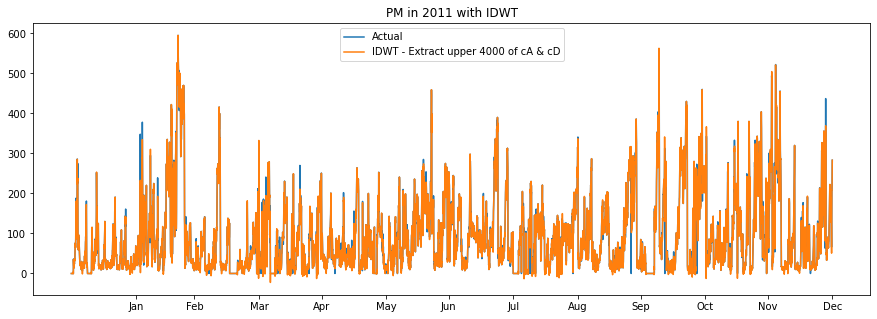

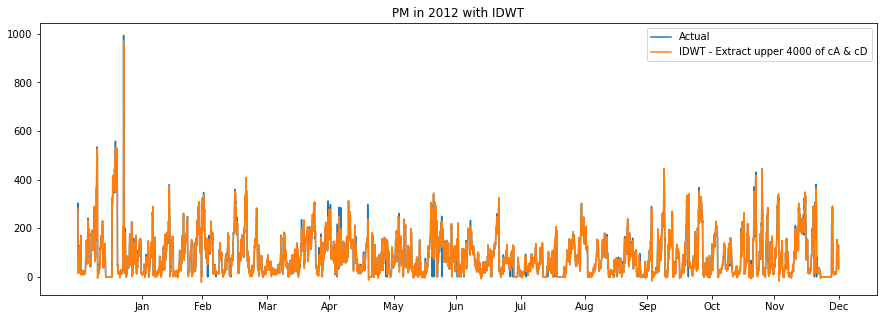

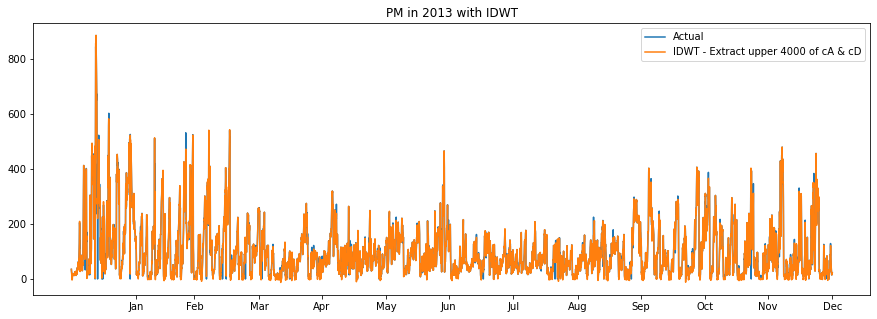

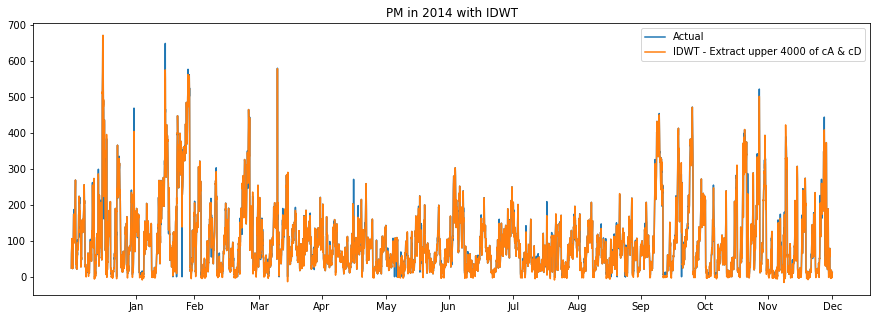

In [54]:
w = pywt.Wavelet('db4')
for k, i in enumerate(inputs):
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(i['pm2.5'].reset_index(drop = True), label ='Actual')
    cA, cD = pywt.dwt(i['pm2.5'], wavelet = w)
    cA4000 = sorted(cA, reverse = True)[4000]
    cD4000 = sorted(cD, reverse = True)[4000]
    ext_cA = [i if i >= cA4000 else 0 for i in cA]
    ext_cD = [i if i >= cD4000 else 0 for i in cD]
    recon = pywt.idwt(ext_cA, ext_cD, wavelet = w)
    ax.plot(recon, label = 'IDWT - Extract upper 4000 of cA & cD')
    plt.xticks(month_ticks[k], month_label)
    plt.title(label = 'PM in 201{} with IDWT'.format(str(k)))
    plt.legend()
    plt.show()
    fig.savefig('./Rawdata/P8_figure/PM in 201{} with IDWT.png'.format(str(k)))

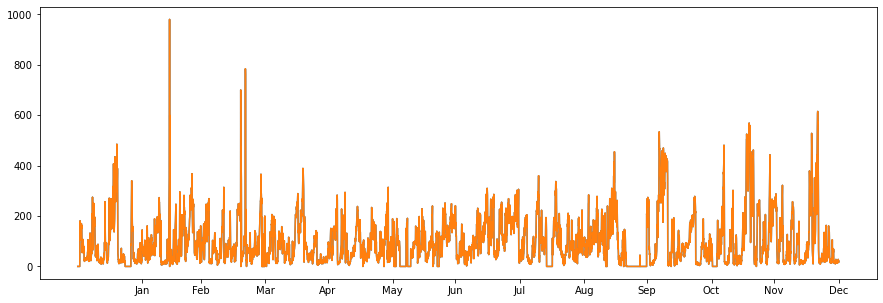

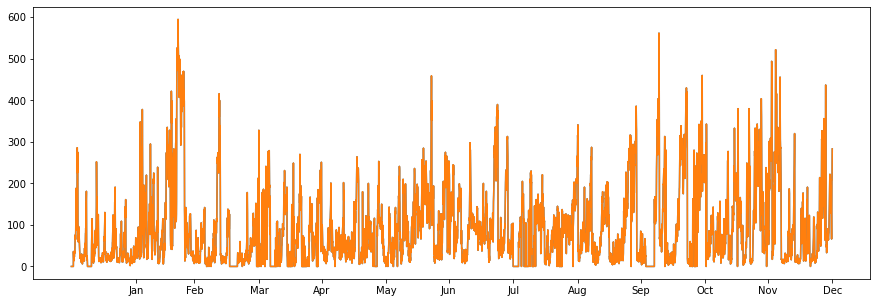

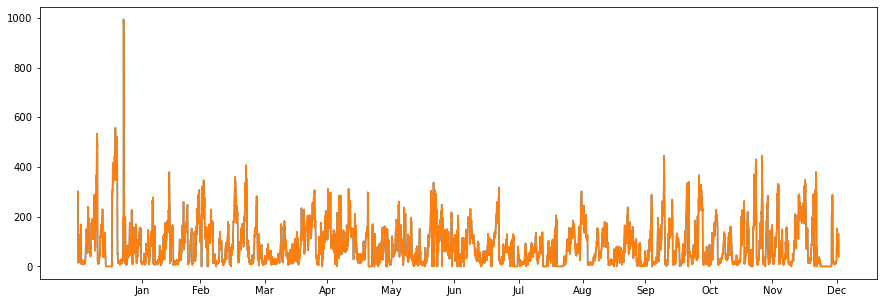

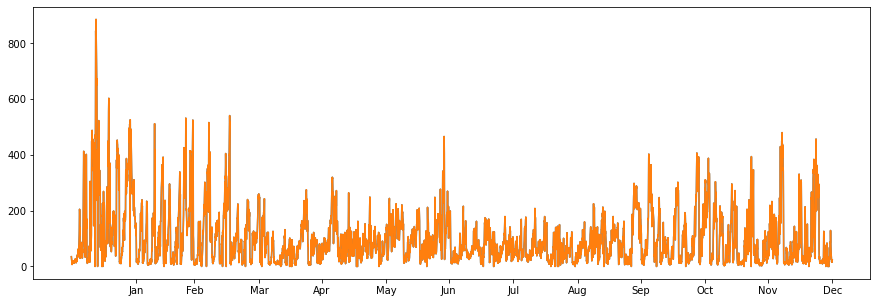

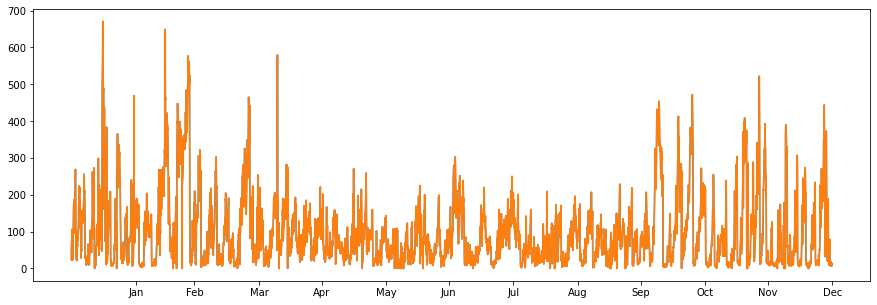

In [22]:
w2 = pywt.Wavelet('haar')
for i in inputs:
    f = plt.figure(figsize = (15, 5))
    plt.plot(i['pm2.5'].reset_index(drop = True))
    cA, cD = pywt.dwt(i['pm2.5'], wavelet = w2)
    recon = pywt.idwt(cA, cD, wavelet = w2)
    plt.plot(recon)
    plt.xticks(month_ticks[k], month_label)
    plt.show()